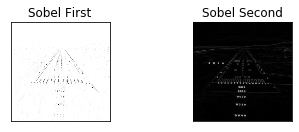

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import as_strided
import math 

image = cv2.imread("../Images/Cropped_Runway_Images/00104.png")

def x_Gradient(gray_image, x, y):
    return -gray_image[x - 1, y - 1] - 2 * gray_image[x, y - 1] - gray_image[x + 1, y - 1] + gray_image[x-1, y + 1] + 2*gray_image[x, y + 1] + gray_image[x + 1, y + 1]
    
def y_Gradient(gray_image, x, y):
    return gray_image[x - 1, y - 1] + 2*gray_image[x - 1, y] + gray_image[x - 1, y + 1] - gray_image[x + 1, y - 1] - 2*gray_image[x + 1 , y] - gray_image[x + 1, y + 1] 


def ScratchSobelDetector(image):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    dst_image = np.zeros((gray_image.shape[0], gray_image.shape[1]), dtype=float)
    for x in range(1, gray_image.shape[0] - 1):
        for y in range(1, gray_image.shape[1] - 1):
            x_grad = x_Gradient(gray_image, x, y)
            y_grad = y_Gradient(gray_image, x, y)             
            sum = math.sqrt(pow(x_grad, 2.0) + pow(y_grad, 2.0))
            if sum > 255:
                sum = 255
            elif sum < 0:
                sum = 0
            else:
                sum = sum
            dst_image[x,y] = sum    
    return dst_image
            
def SobelEdgeDetector(image):
    no_zero = list()
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    image = cv2.GaussianBlur(image,(3,3),0)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    result_image = np.zeros((gray_image.shape[0], gray_image.shape[1]), dtype=float)
    padded_image = np.pad(gray_image, 1 , 'constant', constant_values=(0,0))    
    input_strided = as_strided(
        padded_image, 
        shape = (
            padded_image.shape[0] - kernel_x.shape[0] + 1,
            padded_image.shape[1] - kernel_x.shape[1] + 1,
            kernel_x.shape[0],
            kernel_x.shape[1],
        ),
        strides = (
            padded_image.strides[0],
            padded_image.strides[1],
            padded_image.strides[0],
            padded_image.strides[1], 
        ),
        writeable = False,
    )
    i = j = 0
    for row in input_strided:
        for tile in row:
            multiplied_x = np.multiply(kernel_x, tile)
            multiplied_y = np.multiply(kernel_y, tile)
            sum_x_gradient = np.sum(multiplied_x)
            sum_y_gradient = np.sum(multiplied_y)
            result_image[j, i] = np.hypot(sum_x_gradient, sum_y_gradient)
            i += 1
        i = 0
        j +=1
    result_image *= 255.0 / np.max(result_image)
    return result_image

result = ScratchSobelDetector(image)
result_sc = SobelEdgeDetector(image)

plt.subplot(2,2,1),plt.imshow(result,cmap = 'gray')
plt.title('Sobel First'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(result_sc,cmap = 'gray')
plt.title('Sobel Second'), plt.xticks([]), plt.yticks([])

plt.show()

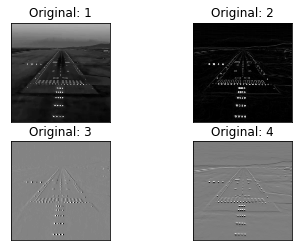

In [41]:
# image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math 

image = cv2.imread("../Images/Cropped_Runway_Images/00104.png")

gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = cv2.GaussianBlur(gray,(3,3),0)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 5)
result = abs(sobel_x) + abs(sobel_y)

for index,elem in enumerate([image,result,sobel_x,sobel_y], 1):
    plt.subplot(2,2,index),plt.imshow(elem, cmap = 'gray')
    plt.title('Original: ' + str(index)), plt.xticks([]), plt.yticks([])
    
plt.show()